In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
url = "https://docs.google.com/spreadsheets/d/1MTnRFZvwCDI1lnrKsQXau-zqcPzDpkg_wsnkP0wkcaA/export?format=csv"

raw_df = pd.read_csv(url, header=None, skip_blank_lines=False)

section_indices = raw_df[raw_df.iloc[:, 1].astype(str).str.contains("Total Data|Daily Data|Hourly Data", case=False, na=False)].index.tolist()

def extract_section(start_idx, next_start_idx=None):
    header_row = start_idx + 2

    if next_start_idx:
        section = raw_df.iloc[header_row:next_start_idx].copy()
    else:
        section = raw_df.iloc[header_row:].copy()
 
    section.columns = raw_df.iloc[header_row - 1].tolist()  
    section = section.dropna(axis=1, how='all')  
    section = section.dropna(axis=0, how='all')  
    section = section.reset_index(drop=True)
    
    return section

total_df = extract_section(section_indices[0], section_indices[1])
daily_df = extract_section(section_indices[1], section_indices[2])
hourly_df = extract_section(section_indices[2])

In [9]:
total_df.head()

,Date,unique_idfas,unique_ips,unique_uas,total_requests,requests_per_idfa,impressions,impressions_per_idfa,idfa_ip_ratio,idfa_ua_ratio,IVT
0,11 Sep to 15 Sep,1191603,1189884,28,1770702,1.485983167,0,0,1.001444679,42557.25,0.004275535714


In [10]:
daily_df.head()

,Date,unique_idfas,unique_ips,unique_uas,total_requests,requests_per_idfa,impressions,impressions_per_idfa,idfa_ip_ratio,idfa_ua_ratio,IVT
0,2025-09-11 0:00:00,93345,93340,22,99280,1.063581338,0,0,1.000053568,4242.954545,0.0034563
1,2025-09-12 0:00:00,515646,515307,25,649515,1.259614154,0,0,1.00065786,20625.84,0.003408541667
2,2025-09-13 0:00:00,406993,406729,25,473346,1.163032288,0,0,1.000649081,16279.72,0.006032583333
3,2025-09-14 0:00:00,400917,400668,26,467152,1.165208759,0,0,1.000621462,15419.88462,0.003835833333
4,2025-09-15 0:00:00,76526,76519,21,81409,1.063808379,0,0,1.000091481,3644.095238,0.0029675


In [11]:
hourly_df.head()

,Date,unique_idfas,unique_ips,unique_uas,total_requests,requests_per_idfa,impressions,impressions_per_idfa,idfa_ip_ratio,idfa_ua_ratio,IVT
0,2025-09-11 14:00:00,3535,3535,17,3577,1.011881188,0,0,1,207.9411765,0.010695
1,2025-09-11 15:00:00,7254,7254,17,7361,1.014750482,0,0,1,426.7058824,0
2,2025-09-11 16:00:00,13737,13737,17,14073,1.024459489,0,0,1,808.0588235,0
3,2025-09-11 17:00:00,13800,13800,18,14074,1.019855072,0,0,1,766.6666667,0.00625
4,2025-09-11 18:00:00,8696,8696,19,8796,1.01149954,0,0,1,457.6842105,0


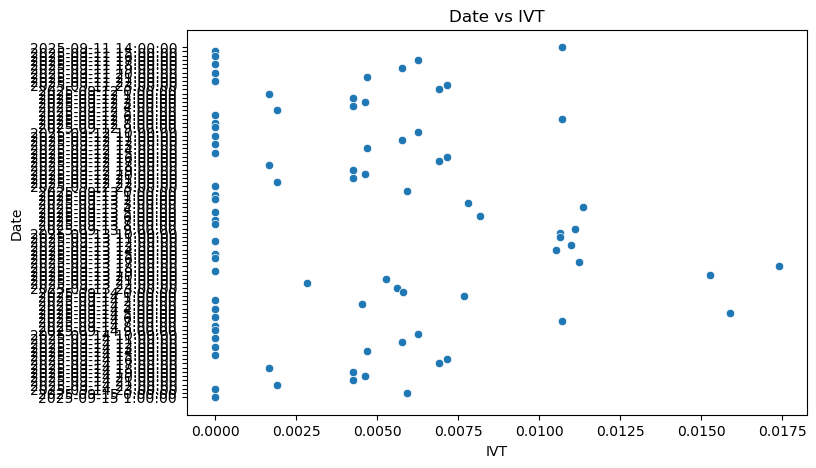

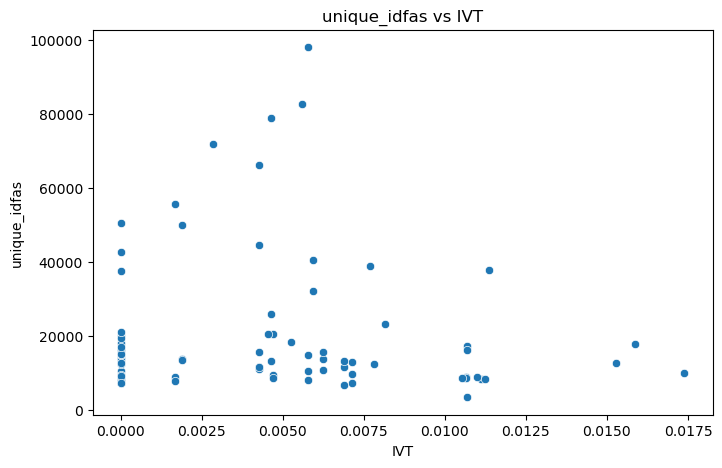

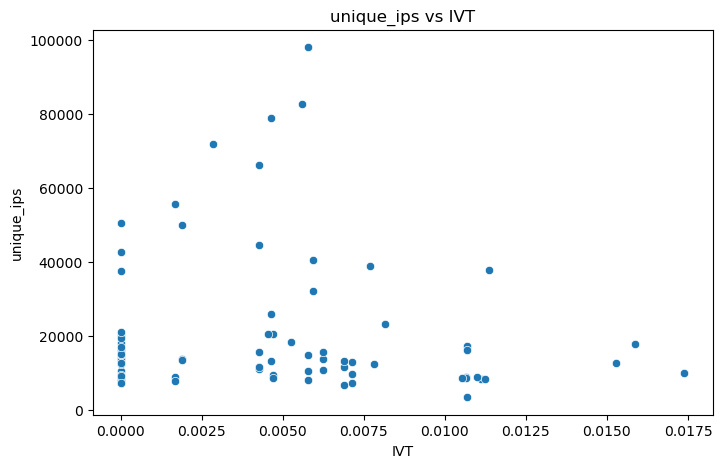

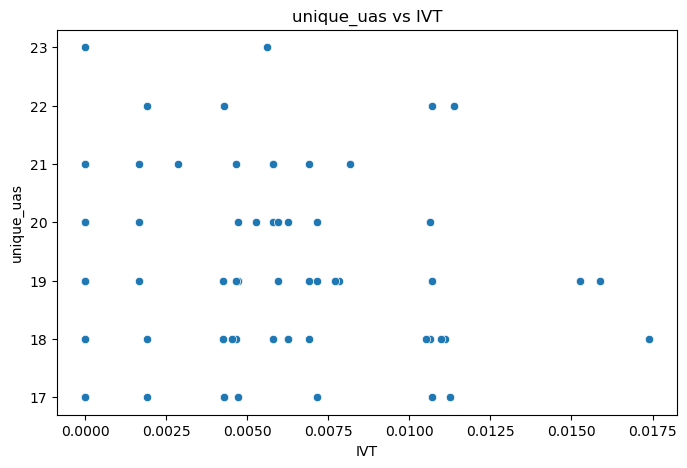

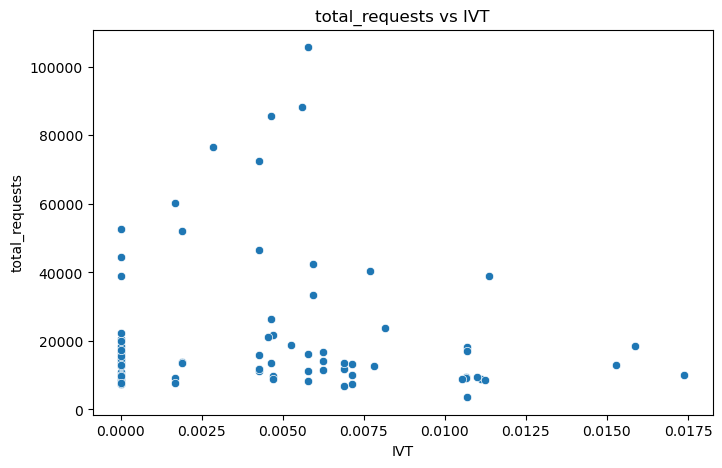

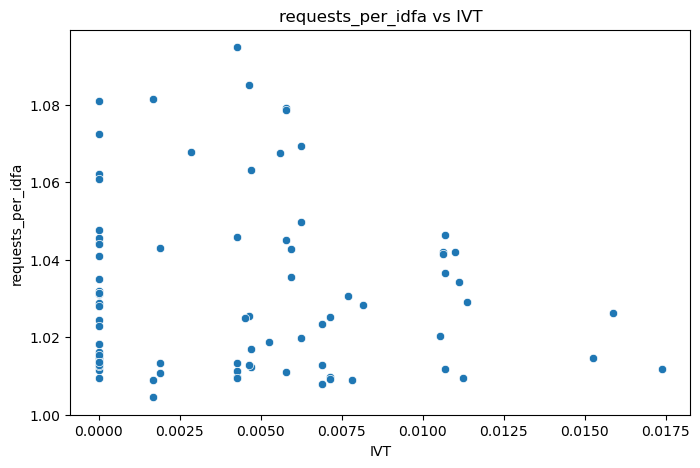

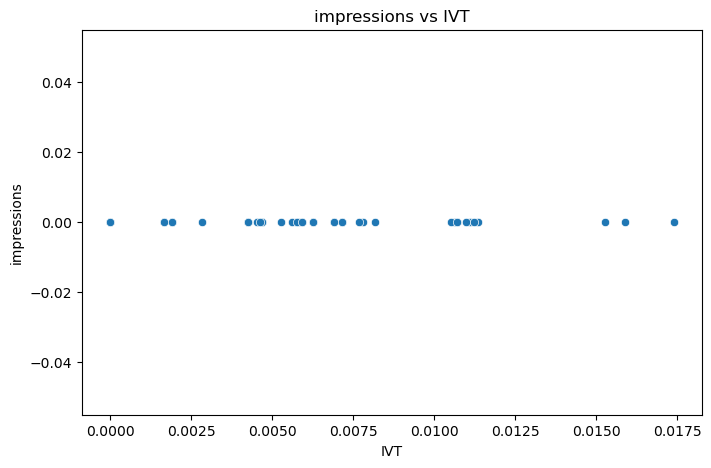

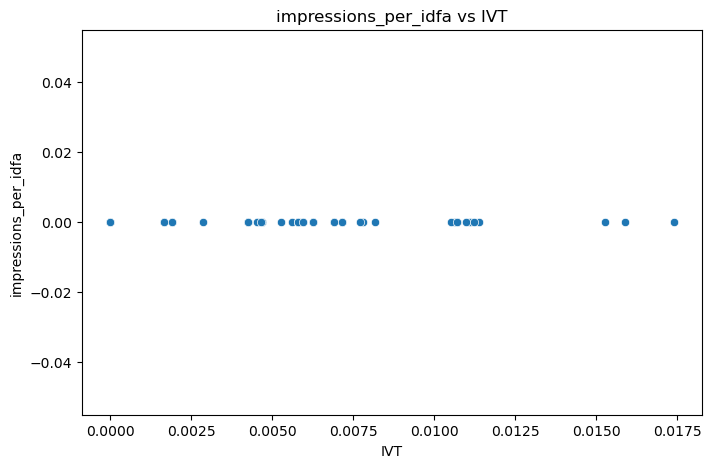

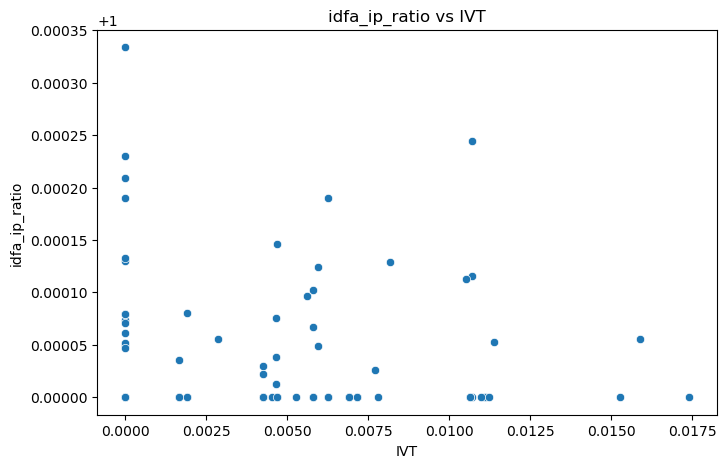

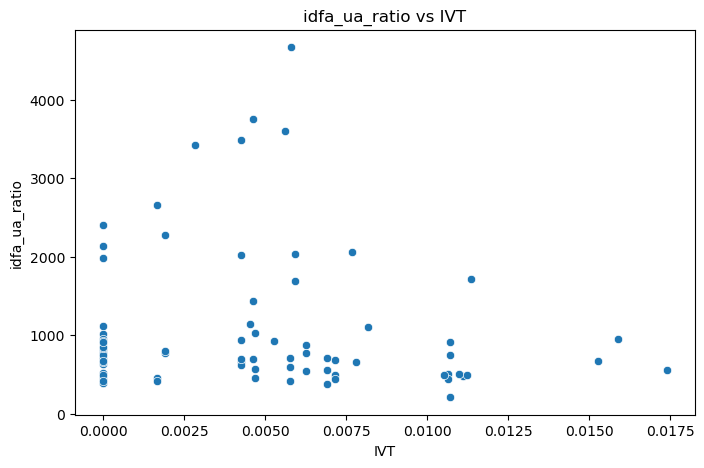

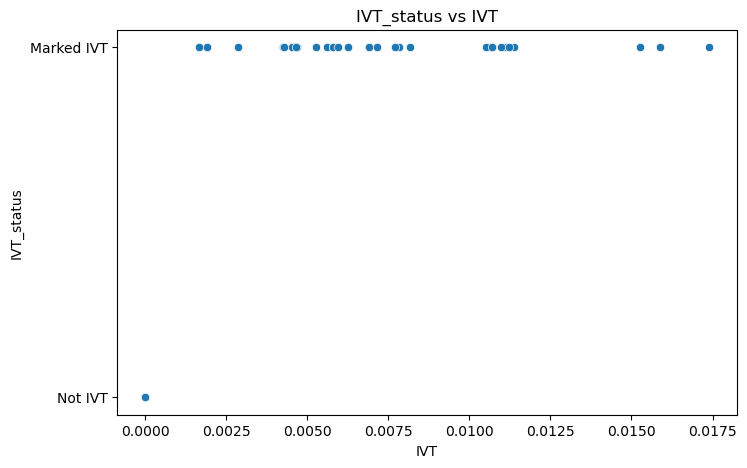

In [31]:
# Plotting the graph (Scatter)
hourly_df = hourly_df.apply(pd.to_numeric, errors='ignore')

reference_col = 'IVT'

for col in hourly_df.columns:
    if col != reference_col:
        plt.figure(figsize=(8,5))
        sns.scatterplot(x=hourly_df[reference_col], y=hourly_df[col])
        plt.title(f'{col} vs {reference_col}')
        plt.show()


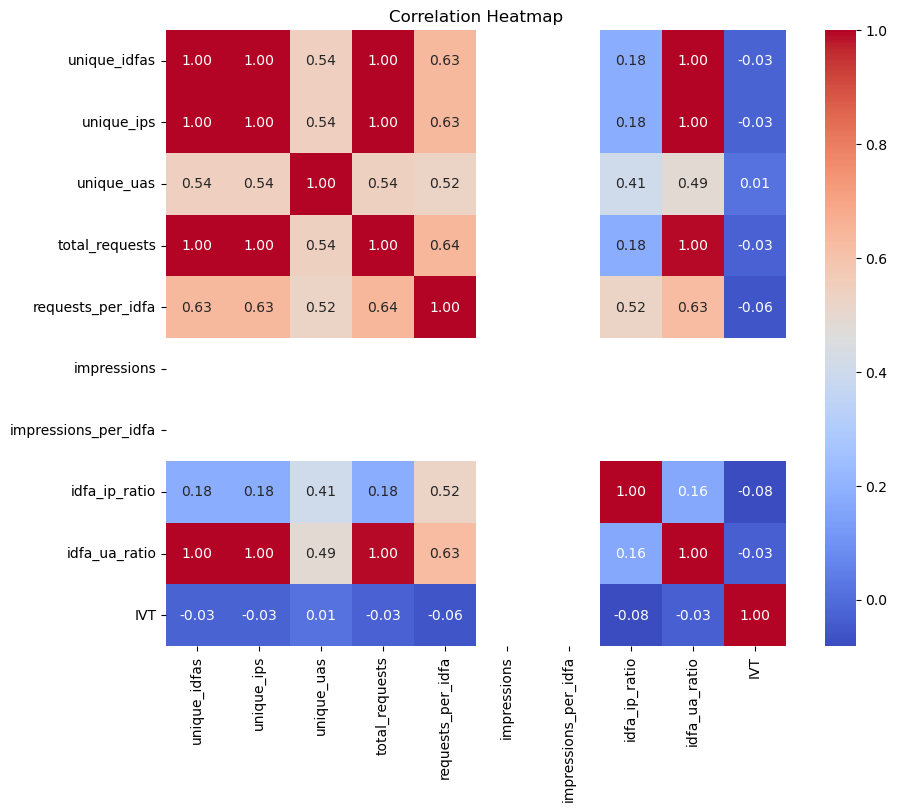

In [32]:
numeric_cols = ['unique_idfas', 'unique_ips', 'unique_uas', 'total_requests',
                'requests_per_idfa', 'impressions', 'impressions_per_idfa',
                'idfa_ip_ratio', 'idfa_ua_ratio', 'IVT']

# Compute correlation matrix
corr = hourly_df[numeric_cols].corr()

# Plotting heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

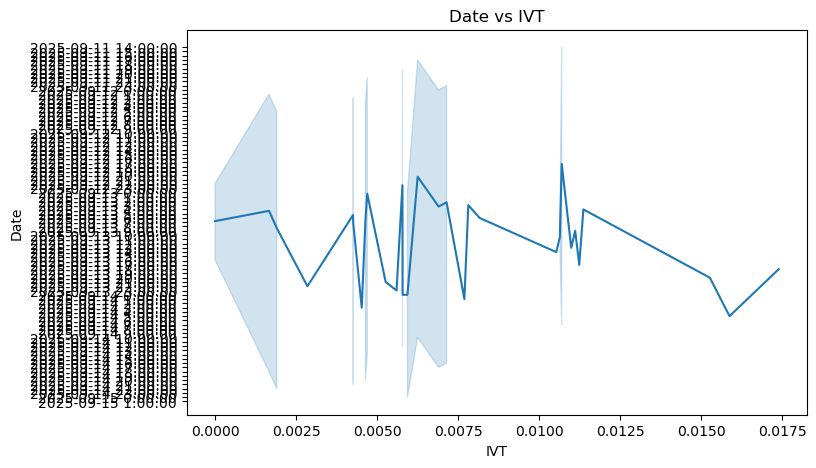

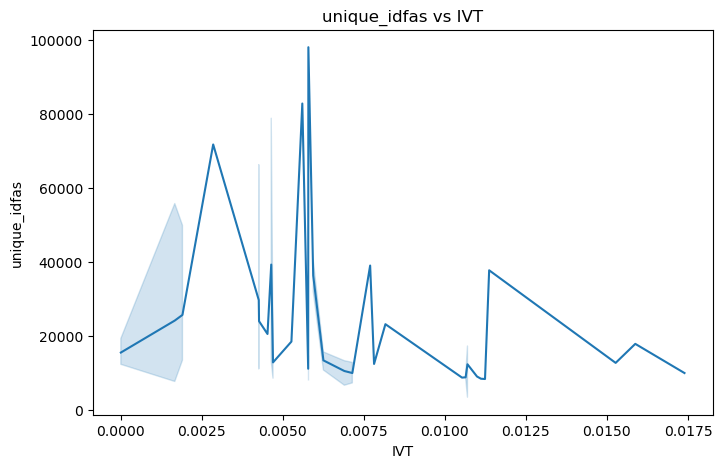

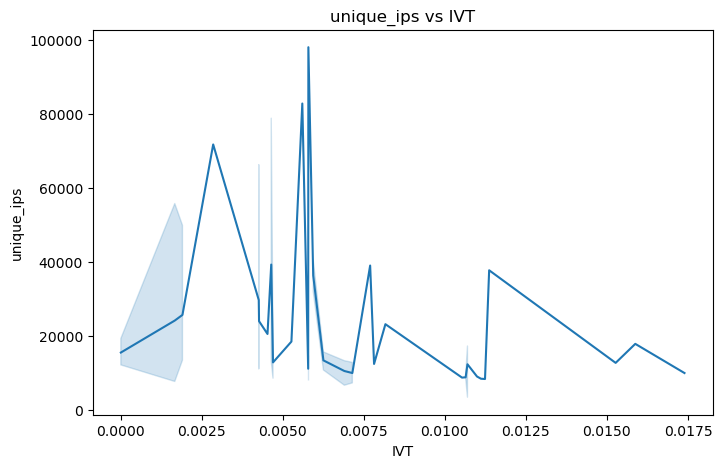

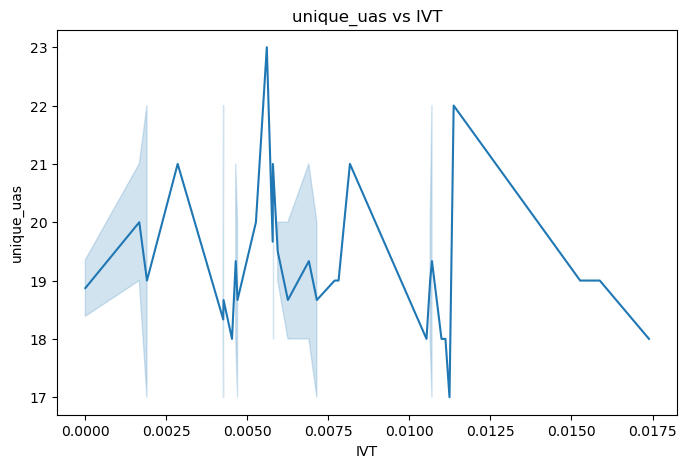

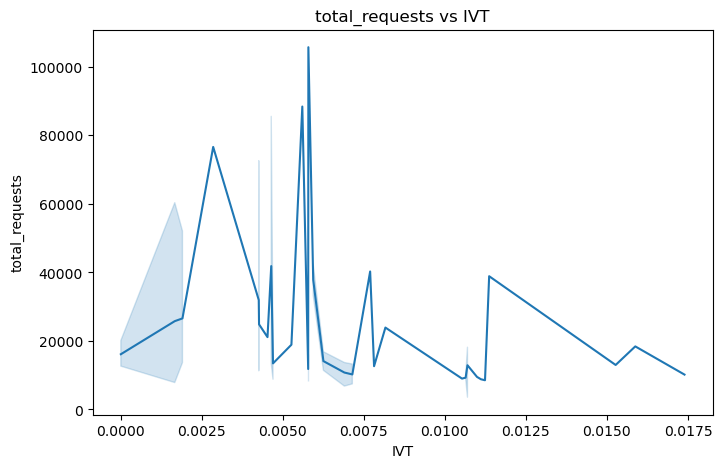

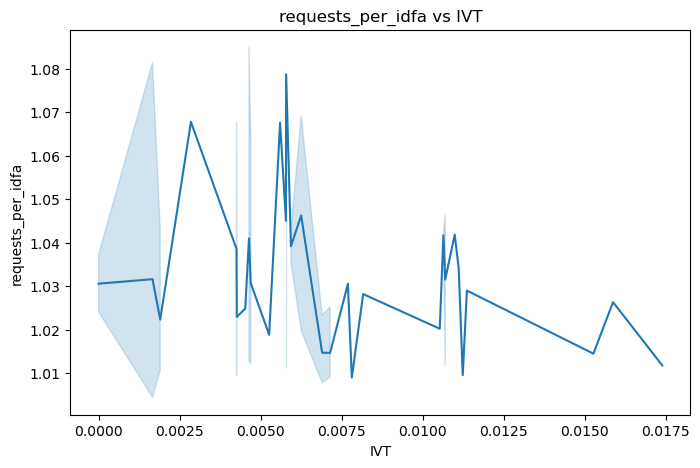

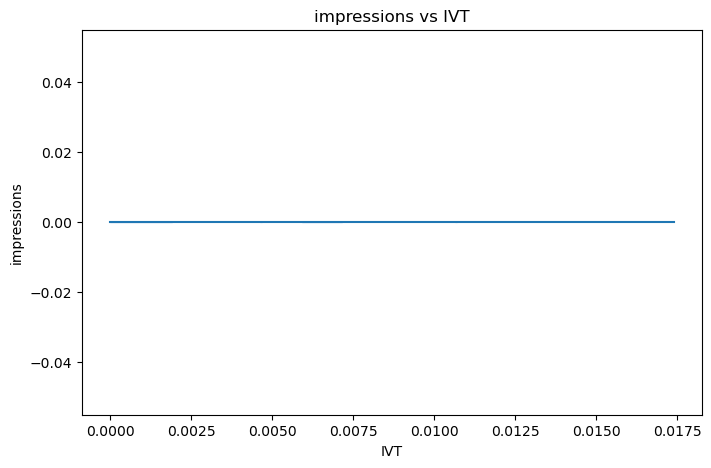

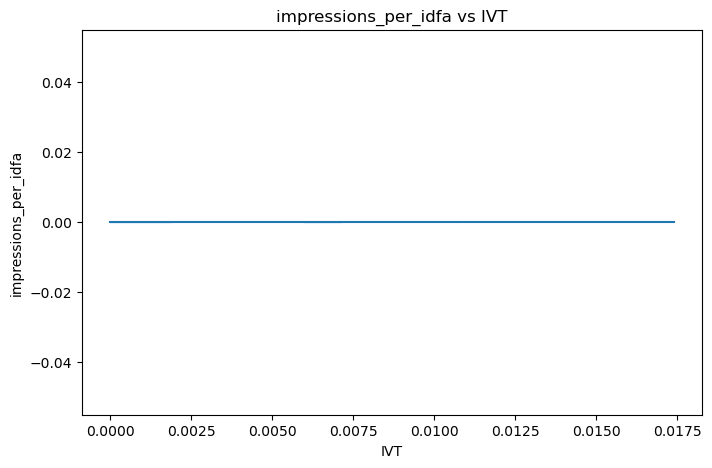

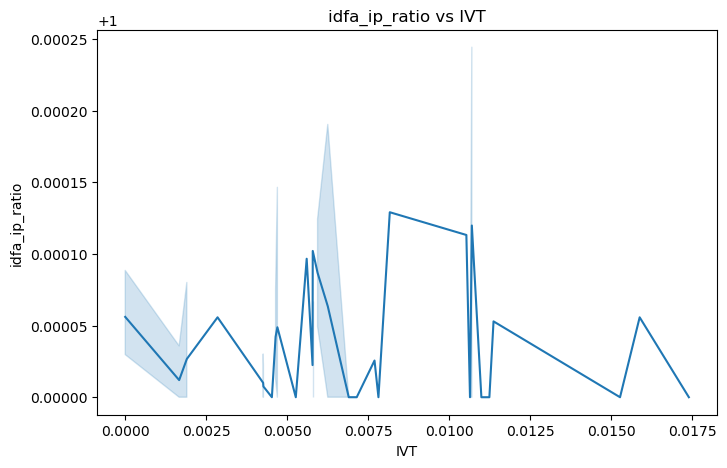

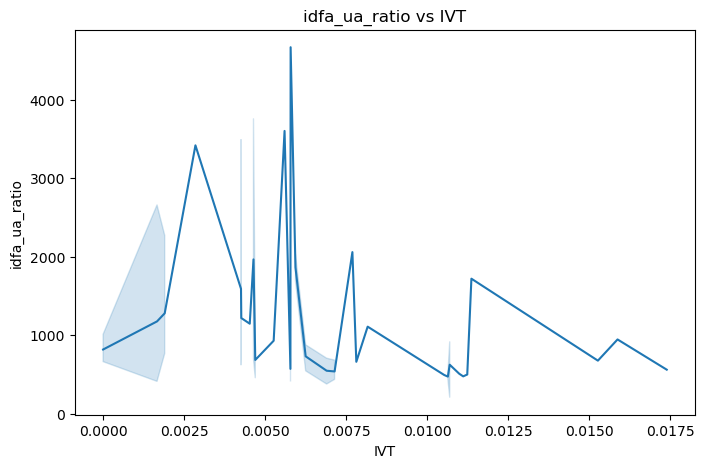

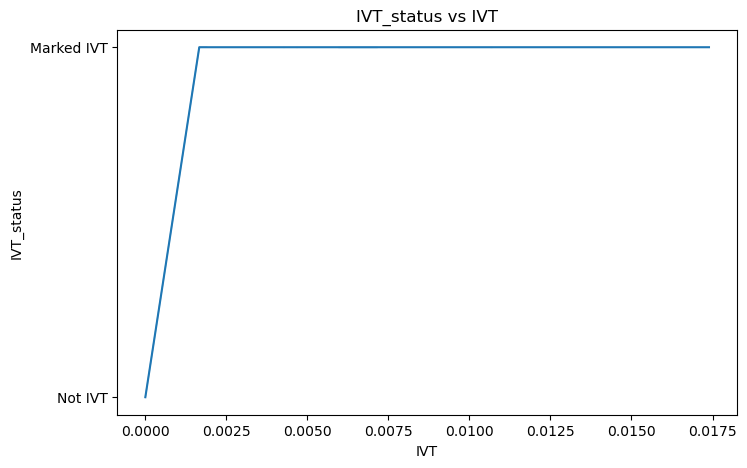

In [33]:
# Plotting the graph (line)
reference_col = 'IVT'

for col in hourly_df.columns:
    if col != reference_col:
        plt.figure(figsize=(8,5))
        sns.lineplot(x=hourly_df[reference_col], y=hourly_df[col])
        plt.title(f'{col} vs {reference_col}')
        plt.show()


In [35]:
# Setting the scale of some factors fro 0 to 1 so that we can plot it
from sklearn.preprocessing import MinMaxScaler

# Metrics to track
metrics = ['total_requests', 'requests_per_idfa', 'idfa_ip_ratio', 'idfa_ua_ratio','unique_uas']

# Copy dataframe
df_plot = hourly_df.copy()

# Normalize metrics to 0-1 range
scaler = MinMaxScaler()
df_plot[metrics] = scaler.fit_transform(df_plot[metrics])

# IVT can also be normalized if needed (or keep as is)
df_plot['IVT_norm'] = scaler.fit_transform(df_plot[['IVT']])


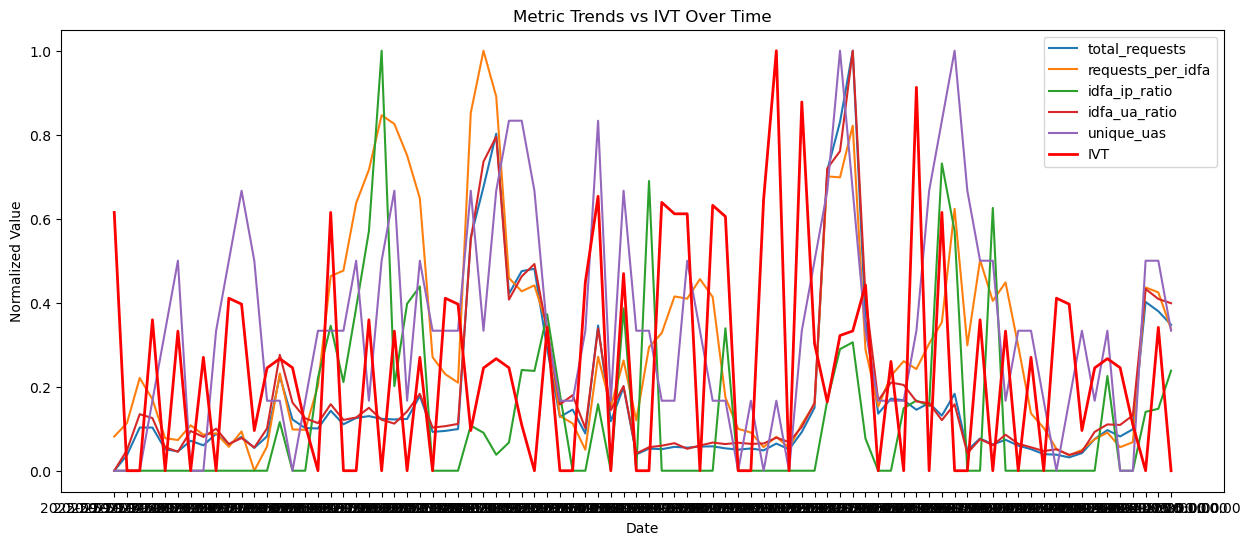

In [30]:
plt.figure(figsize=(15,6))

# Plot metrics
for metric in metrics:
    plt.plot(df_plot['Date'], df_plot[metric], label=metric)

# Plot IVT on same graph
plt.plot(df_plot['Date'], df_plot['IVT_norm'], label='IVT', color='red', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Metric Trends vs IVT Over Time')
plt.legend()
plt.show()
